In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
data = pd.read_excel(r'C:\Users\raflg\Downloads\Databases\Equipe.xls')
df = data.copy()
df

,numsemaine,nomSeance,dateSeance,duree,sportif,marqueur1,marqueur2,marqueur3,marqueur4,marqueur5,...,marqueur9,marqueur10,marqueur11,marqueur12,marqueur13,marqueur14,marqueur15,marqueur16,marqueur17,marqueur18
0,2104,Seance individuelle,2021-01-30,35,Joueur-1,3.7,2.3,5.4,3.7,0.0,...,2.6,2.4,2.2,2.1,2.0,2.0,3.3,0.0,2.3,0.0
1,2104,Seance collective,2021-01-29,50,Joueur-1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,2104,Seance individuelle,2021-01-28,80,Joueur-1,4.1,2.0,6.5,5.0,0.0,...,2.4,4.3,1.7,2.4,1.9,2.0,4.0,0.0,2.2,0.0
3,2053,Seance individuelle,2020-12-30,45,Joueur-1,3.6,2.4,5.7,4.0,0.0,...,0.0,0.0,0.0,3.4,2.1,2.0,3.5,0.0,2.2,0.0
4,2046,Seance collective,2020-11-13,60,Joueur-1,3.6,2.3,3.4,2.2,3.6,...,2.3,2.2,2.4,1.9,1.5,1.9,2.8,0.0,2.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,2027,Seance collective,2020-07-03,65,Joueur-29,1.0,0.0,1.0,0.7,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7776,2027,Seance collective,2020-07-02,60,Joueur-29,1.0,1.0,1.3,1.6,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7777,2027,Seance collective,2020-07-01,280,Joueur-29,9.5,0.0,4.0,2.9,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,8.4,1.0,1.0,0.0
7778,2027,Seance collective,2020-06-30,70,Joueur-29,1.0,1.0,1.4,1.8,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   numsemaine  7780 non-null   int64         
 1   nomSeance   7780 non-null   object        
 2   dateSeance  7780 non-null   datetime64[ns]
 3   duree       7780 non-null   int64         
 4   sportif     7780 non-null   object        
 5   marqueur1   7780 non-null   float64       
 6   marqueur2   7780 non-null   float64       
 7   marqueur3   7780 non-null   float64       
 8   marqueur4   7780 non-null   float64       
 9   marqueur5   7780 non-null   float64       
 10  marqueur6   7780 non-null   float64       
 11  marqueur7   7780 non-null   float64       
 12  marqueur8   7780 non-null   float64       
 13  marqueur9   7780 non-null   float64       
 14  marqueur10  7780 non-null   float64       
 15  marqueur11  7780 non-null   float64       
 16  marqueur12  7780 non-nul

## Créer des copies de df selon conditions pour la visualisation qui va suivre

In [4]:
#Identifier les différentes séances
df.nomSeance.unique()

array(['Seance individuelle', 'Seance collective', 'Match', 'Medical',
       'Autre', 'Seance reentrainement'], dtype=object)

In [5]:
df_seances = df[(df['nomSeance'] == 'Seance individuelle') | (df['nomSeance'] == 'Seance collective')].copy()
#Nommer par défaut 'Seance collective' et 'Seance individuelle' : 'Seance'
df_seances['nomSeance'] = 'Seance'

df_seances_ind = df[df['nomSeance'] == 'Seance individuelle'].copy()
df_seances_col = df[df['nomSeance'] == 'Seance collective'].copy()
df_matchs = df[df['nomSeance'] == 'Match'].copy()

## Comparer combien de séances sont saisies chaque semaine par les joueurs

In [6]:
#Séances individuelles
df_seances_ind.pivot_table(index='sportif', columns='numsemaine', values='nomSeance', aggfunc='count')

numsemaine,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,...,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115
sportif,,,,,,,,,,,,,,,,,,,,,
Joueur-1,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN
Joueur-11,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,3.0,3.0,1.0,1.0,NaN,1.0,NaN,NaN,3.0,1.0
Joueur-12,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,6.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
Joueur-13,NaN,NaN,1.0,NaN,4.0,5.0,2.0,1.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-14,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,...,5.0,1.0,1.0,1.0,2.0,3.0,1.0,NaN,NaN,NaN
Joueur-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-16,3.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,2.0,...,NaN,1.0,NaN,2.0,1.0,2.0,1.0,NaN,NaN,1.0
Joueur-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,7.0,6.0,...,6.0,6.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,NaN


In [7]:
#Séances collectives
df_seances_col.pivot_table(index='sportif', columns='numsemaine', values='nomSeance', aggfunc='count')

numsemaine,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
sportif,,,,,,,,,,,,,,,,,,,,,
Joueur-1,6.0,NaN,10.0,9.0,7.0,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-10,NaN,NaN,8.0,10.0,7.0,8.0,9.0,8.0,7.0,8.0,...,6.0,4.0,7.0,7.0,6.0,6.0,8.0,3.0,6.0,5.0
Joueur-11,7.0,5.0,10.0,10.0,7.0,8.0,9.0,8.0,7.0,8.0,...,8.0,4.0,NaN,7.0,5.0,6.0,8.0,7.0,6.0,4.0
Joueur-12,7.0,5.0,10.0,10.0,7.0,8.0,9.0,8.0,7.0,8.0,...,8.0,6.0,4.0,1.0,6.0,6.0,8.0,7.0,6.0,6.0
Joueur-13,7.0,5.0,6.0,9.0,3.0,NaN,4.0,6.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-14,7.0,5.0,10.0,10.0,7.0,7.0,8.0,8.0,7.0,3.0,...,8.0,2.0,6.0,6.0,5.0,5.0,6.0,4.0,NaN,NaN
Joueur-15,7.0,5.0,10.0,10.0,7.0,8.0,8.0,8.0,6.0,5.0,...,6.0,3.0,7.0,3.0,5.0,5.0,7.0,5.0,NaN,NaN
Joueur-16,7.0,5.0,10.0,9.0,7.0,7.0,8.0,8.0,7.0,8.0,...,8.0,6.0,7.0,7.0,6.0,6.0,7.0,7.0,6.0,5.0
Joueur-17,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comparer également pour les matchs

In [8]:
df_matchs.pivot_table(index='sportif', columns='numsemaine', values='nomSeance', aggfunc='count')

numsemaine,2031,2032,2033,2035,2036,2037,2038,2040,2041,2042,...,2051,2102,2103,2106,2107,2108,2109,2112,2113,2114
sportif,,,,,,,,,,,,,,,,,,,,,
Joueur-1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-10,2.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,NaN,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
Joueur-11,2.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN
Joueur-12,2.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,NaN,2.0,...,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0
Joueur-14,1.0,NaN,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-15,2.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-16,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-18,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Joueur-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,...,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


# Statistiques descriptives

In [9]:
#Arranger une nouvelle df pour obtenir le tableau descriptif voulu
df_saison_arranged = df.melt(id_vars=['numsemaine', 'nomSeance', 'dateSeance', 'sportif'],
                                var_name='Perceptions', value_name='Value')

df_saison_desc = df_saison_arranged[(df_saison_arranged['nomSeance'] == 'Seance individuelle') | 
                                    (df_saison_arranged['nomSeance'] == 'Match') | 
                                   (df_saison_arranged['nomSeance'] == 'Seance collective')].copy()

In [10]:
#Définir quelques formules statistiques
def d10(x):
    return x.quantile(0.1)

def d20(x):
    return x.quantile(0.2)

def d30(x):
    return x.quantile(0.3)

def d40(x):
    return x.quantile(0.4)

def d50(x):
    return x.quantile(0.5)

def d60(x):
    return x.quantile(0.6)

def d70(x):
    return x.quantile(0.7)

def d80(x):
    return x.quantile(0.8)

def d90(x):
    return x.quantile(0.9)

#Créér les aggregations voulues
agg_func_desc = {'Value':['min', 'max', 'median', d10, d20, d30, d40, d50, d60, d70, d80, d90]}

#Etablir le tableau descriptif
desc_groupby = df_saison_desc.groupby(['numsemaine', 'Perceptions', 'nomSeance']).agg(agg_func_desc).dropna()

## Tableau descriptif des saisies pour chaque semaine en comparant séances et matchs

In [11]:
#Semaine 2031 (31è semaine de 2020)
desc_groupby.loc[2031]

Value                                     \
                                  min    max median    d10    d20    d30   
Perceptions nomSeance                                                      
duree       Match                45.0  120.0  70.00  50.00  70.00  70.00   
            Seance collective    15.0  120.0  60.00  30.00  50.00  58.50   
            Seance individuelle  40.0   85.0  60.00  44.00  48.00  50.00   
marqueur1   Match                 0.0    7.0   3.20   1.00   1.00   1.00   
            Seance collective     0.0    6.8   2.90   1.00   1.00   1.80   
            Seance individuelle   1.6    7.4   3.20   1.68   1.88   2.08   
marqueur10  Match                 0.0    5.1   1.00   0.00   1.00   1.00   
            Seance collective     0.0    6.8   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    1.2   1.00   1.00   1.00   1.00   
marqueur11  Match                 0.0    9.1   2.60   1.00   1.00   1.00   
            Seance collective     0.6    8.1   2.35   1.00   1.00   1.00   
            Seance individuelle   1.0    2.6   1.00   1.00   1.00   1.00   
marqueur12  Match                 1.0    2.9   1.00   1.00   1.00   1.00   
            Seance collective     0.0    8.4   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    6.1   1.00   1.00   1.00   1.00   
marqueur13  Match                 1.0    1.8   1.00   1.00   1.00   1.00   
            Seance collective     0.0    7.7   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    1.0   1.00   1.00   1.00   1.00   
marqueur14  Match                 0.0    3.3   1.00   0.40   1.00   1.00   
            Seance collective     0.0    6.3   1.00   1.00   1.00   1.00   
            Seance individuelle   0.0    9.4   1.00   0.80   1.00   1.00   
marqueur15  Match                 0.0    9.6   4.70   2.20   3.08   3.40   
            Seance collective     0.0    9.9   3.10   1.00   1.58   2.10   
            Seance individuelle   1.0    6.4   2.60   1.40   1.56   1.72   
marqueur16  Match                 0.0    0.0   0.00   0.00   0.00   0.00   
            Seance collective     0.0    0.0   0.00   0.00   0.00   0.00   
            Seance individuelle   0.0    0.0   0.00   0.00   0.00   0.00   
marqueur17  Match                 0.0    6.6   1.00   0.00   1.00   1.00   
            Seance collective     0.0    9.5   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    1.0   1.00   1.00   1.00   1.00   
marqueur18  Match                 0.0    6.0   0.00   0.00   0.00   0.00   
            Seance collective     0.0    9.8   0.00   0.00   0.00   0.00   
            Seance individuelle   0.0    2.6   1.60   0.00   0.00   0.00   
marqueur2   Match                 1.0    1.0   1.00   1.00   1.00   1.00   
            Seance collective     0.0    7.2   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    1.0   1.00   1.00   1.00   1.00   
marqueur3   Match                 1.5    9.9   7.40   3.64   5.18   6.18   
            Seance collective     0.0    9.4   3.70   1.00   1.90   2.50   
            Seance individuelle   1.7    9.1   4.80   1.94   2.18   2.74   
marqueur4   Match                 0.2    9.7   6.20   4.44   4.98   5.42   
            Seance collective     0.6    9.9   3.90   2.10   2.48   2.97   
            Seance individuelle   1.7    7.1   3.50   1.78   1.92   2.12   
marqueur5   Match                 0.0    5.3   2.40   1.00   1.00   1.32   
            Seance collective     0.0    6.2   1.45   1.00   1.00   1.00   
            Seance individuelle   1.0    1.1   1.00   1.00   1.00   1.00   
marqueur6   Match                 0.0    5.6   1.70   0.40   1.00   1.00   
            Seance collective     0.0    7.0   1.00   1.00   1.00   1.00   
            Seance individuelle   1.0    1.0   1.00   1.00   1.00   1.00   
marqueur7   Match                 0.0    8.7   1.90   1.00   1.00   1.00   
            Seance collective     0.0    7.8   1.00   1.00   1.00   1.00   
    

# Visualisation

## Visualiser les distributions des marqueurs sur toute la saison

In [12]:
#Retirer les marqueurs sans variations, cela va permettre de ne pas faire bugger le test non-paramètrique
plot_columns = ['marqueur1', 'marqueur2', 'marqueur3', 'marqueur4', 'marqueur5', 'marqueur6', 'marqueur7', 'marqueur8',
                'marqueur9', 'marqueur10', 'marqueur11', 'marqueur12', 'marqueur13', 'marqueur14', 'marqueur15', 'marqueur17']

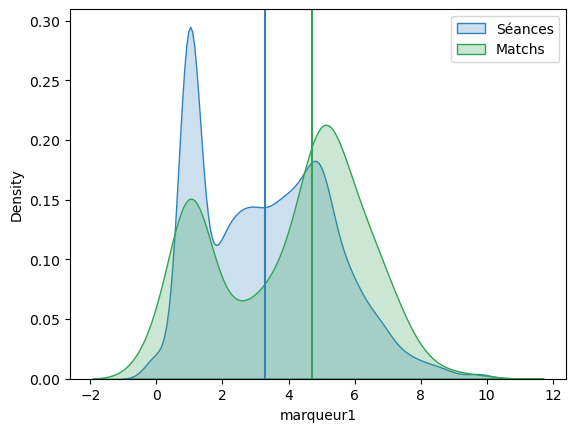

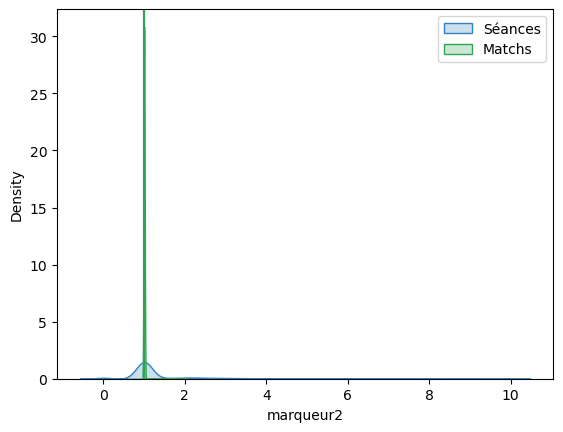

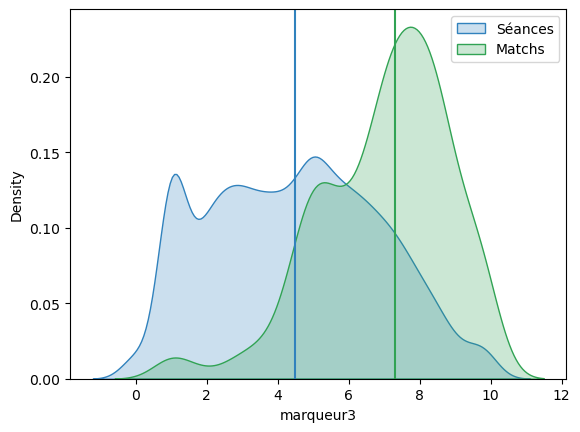

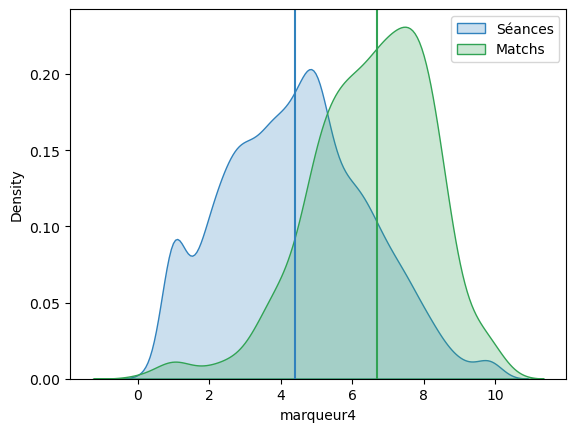

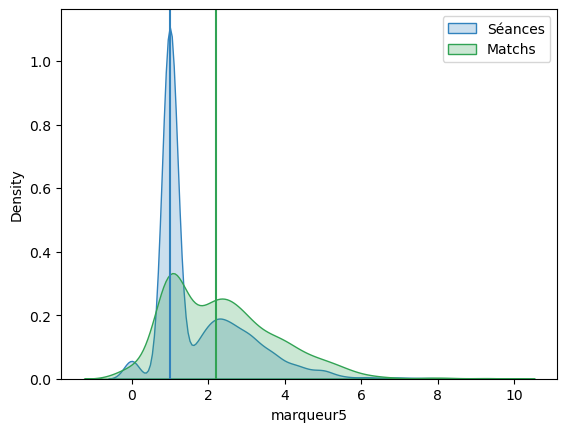

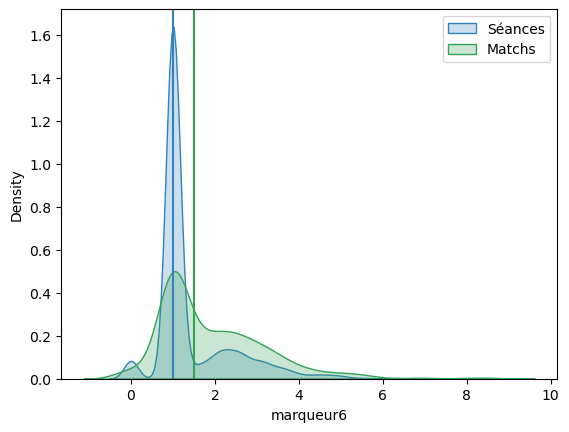

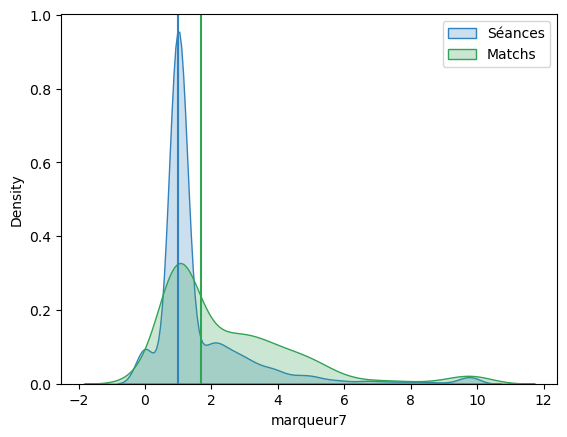

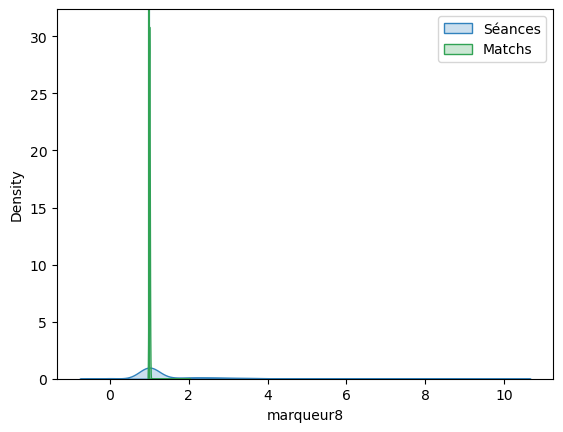

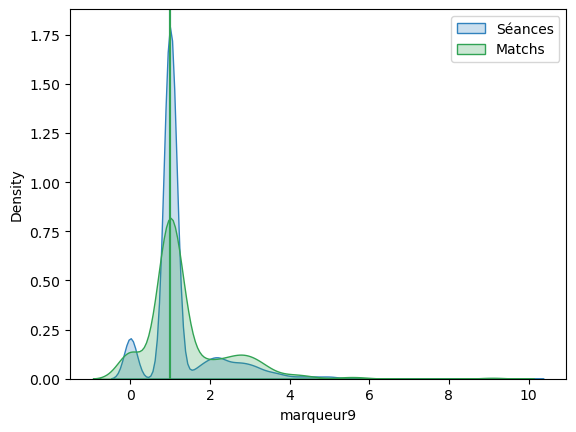

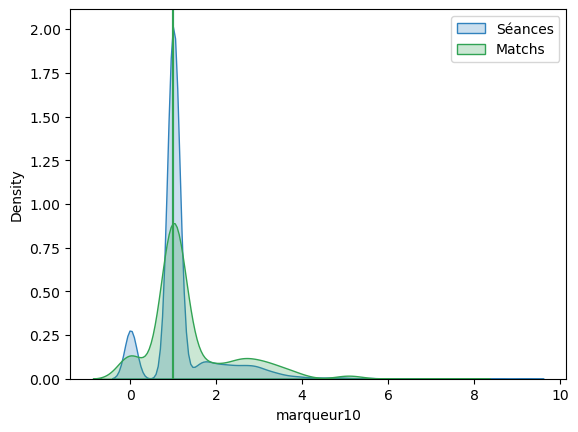

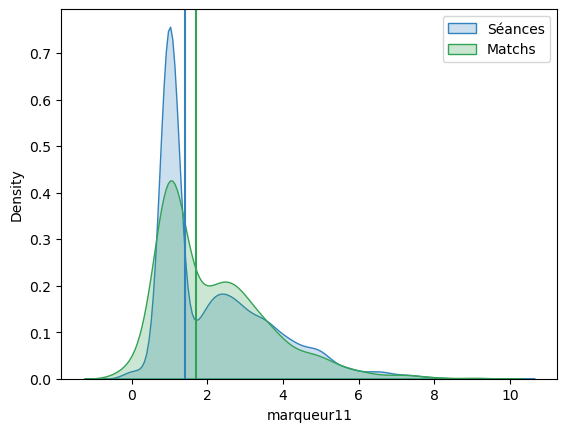

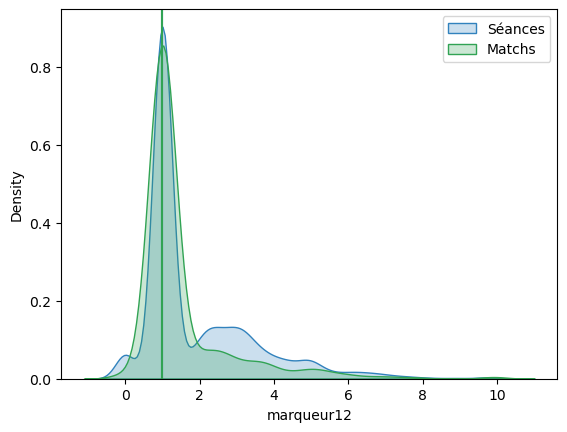

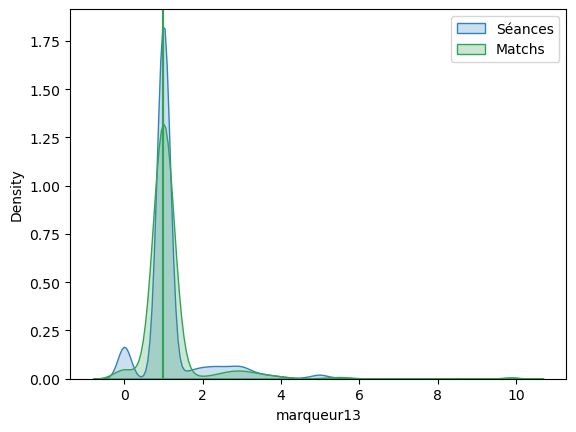

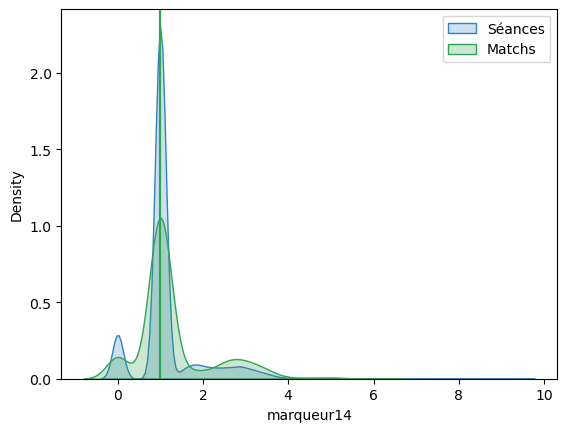

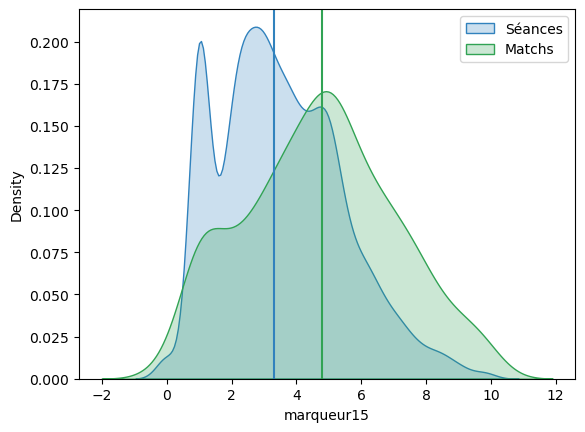

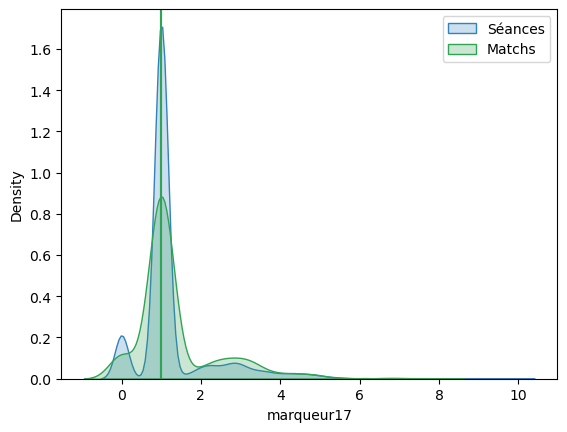

In [13]:
for col in plot_columns:
    fig, ax = plt.subplots()
    sns.kdeplot(df_seances[col], label='Séances', color='#3182bd', fill=True)
    ax.axvline(df_seances[col].median(), color='#3182bd')
    sns.kdeplot(df_matchs[col], label='Matchs', color='#31a354', fill=True)
    ax.axvline(df_matchs[col].median(), color='#31a354')
    plt.legend()

In [14]:
df_split = df.copy()

## Créer des périodes de plusieurs semaines (un mois par défaut)

In [15]:
df_split['Annee'] = df_split.dateSeance.dt.year.astype(str)
df_split['Mois'] = df_split.dateSeance.dt.month.astype(str).str.pad(width=2, fillchar='0')
df_split['Periode'] = df_split['Annee'].str.cat(df_split['Mois'], sep='-')

In [16]:
df_split.loc[df_split['nomSeance'] == 'Seance individuelle', 'nomSeance'] = 'Seance'
df_split.loc[df_split['nomSeance'] == 'Seance collective', 'nomSeance'] = 'Seance'
df_split = df_split[(df_split['nomSeance'] == 'Seance') | (df_split['nomSeance'] == 'Match')].copy()
df_split = df_split.drop(columns='duree')

In [17]:
df_split_arranged = df_split.copy()

In [18]:
df_split_arranged = df_split_arranged.melt(id_vars=['numsemaine', 'nomSeance', 'dateSeance', 'sportif', 'Annee', 'Mois',
                                                    'Periode'],
                                           var_name='Perceptions', value_name='Value')

## Comparer les distributions des saisies pour chaque période

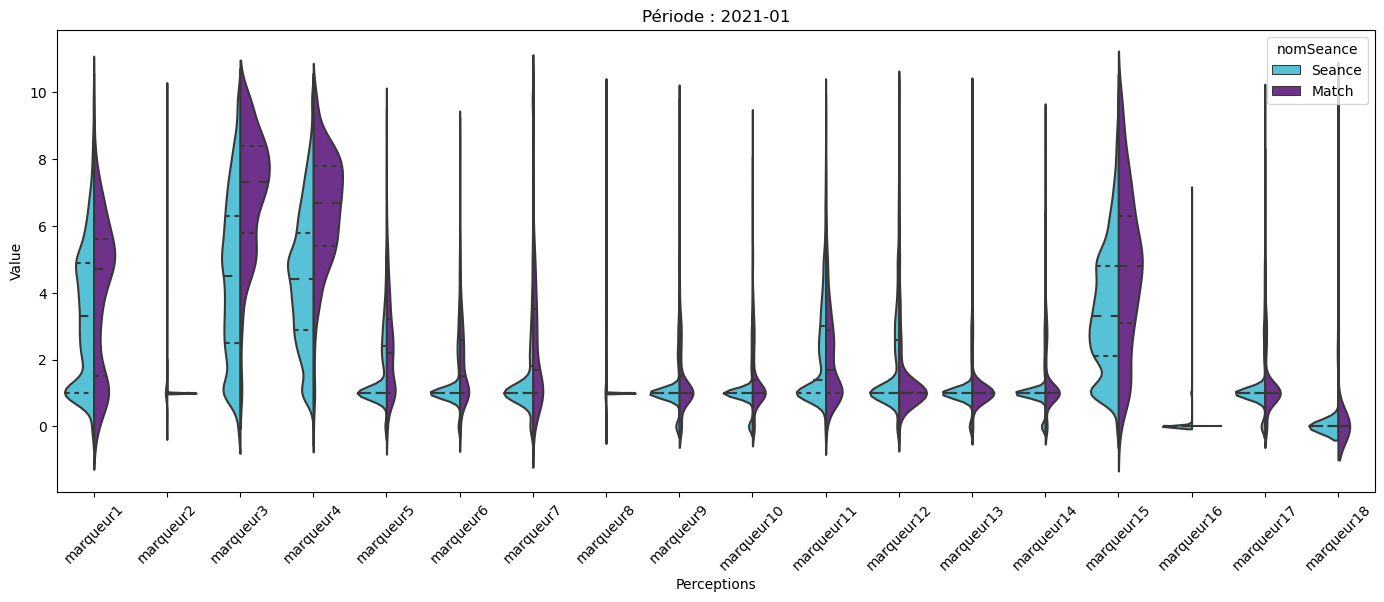

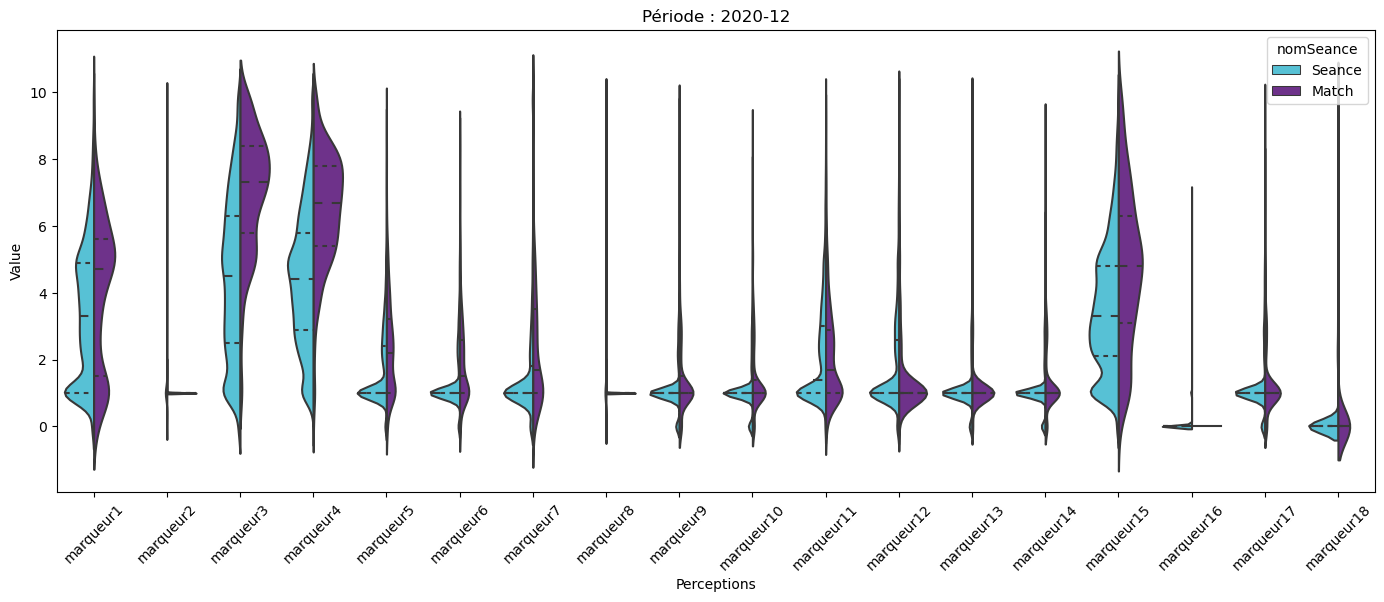

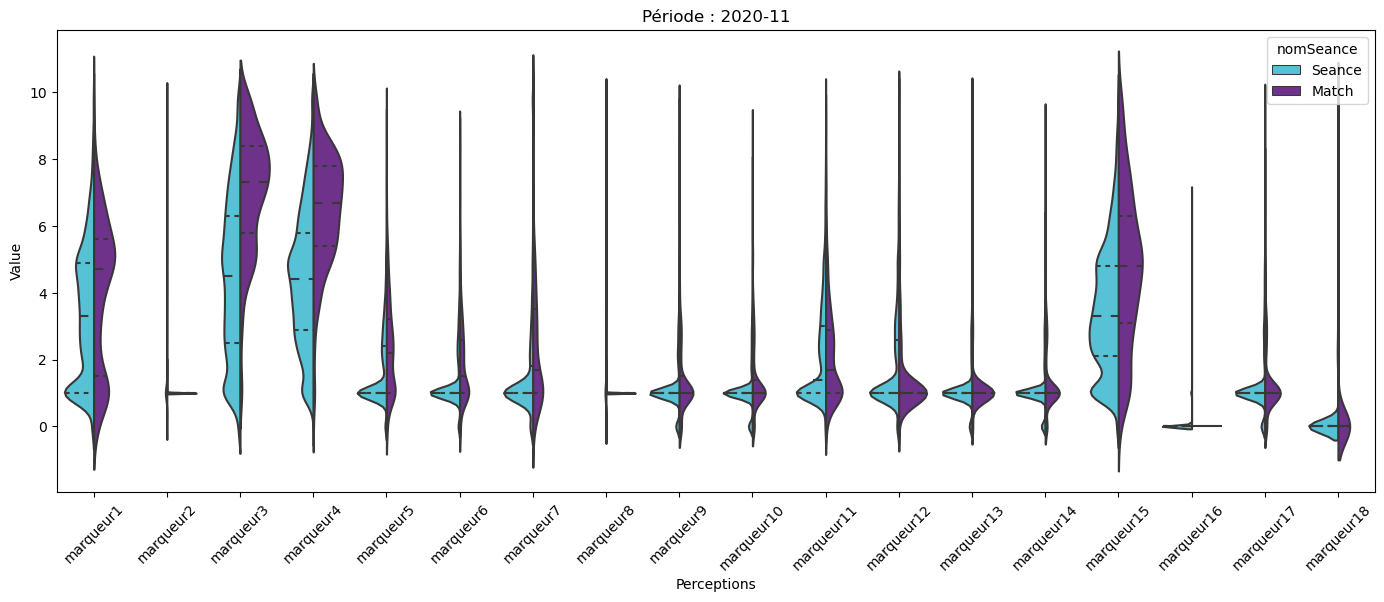

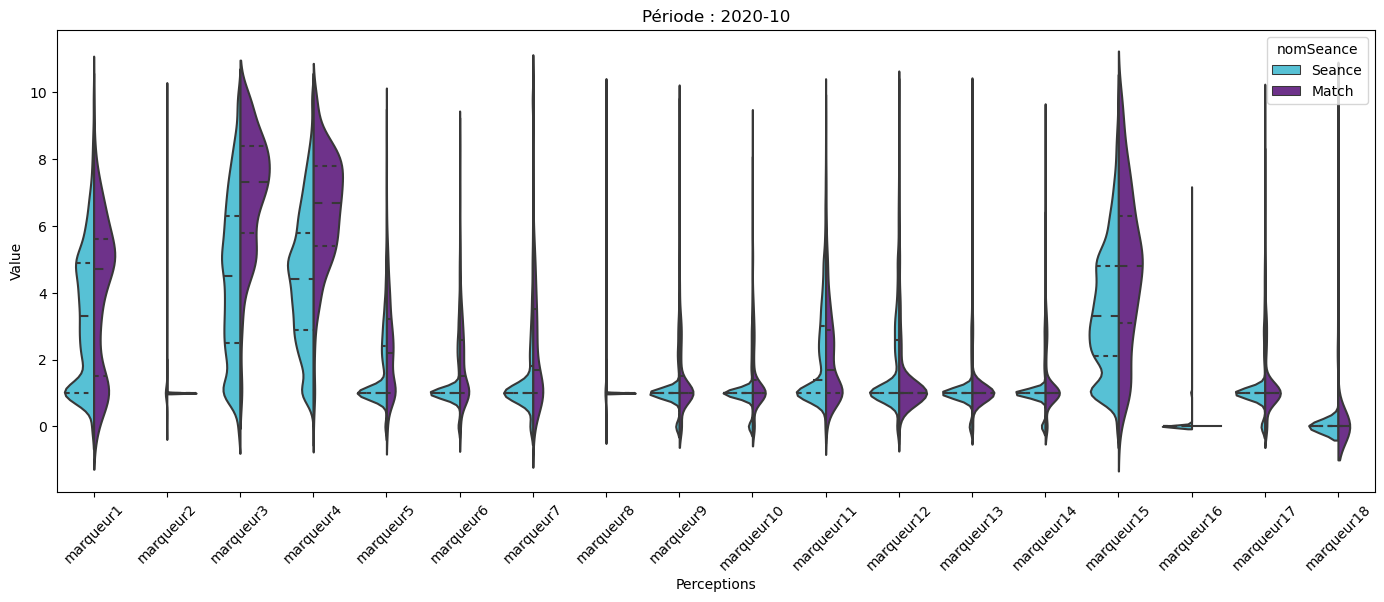

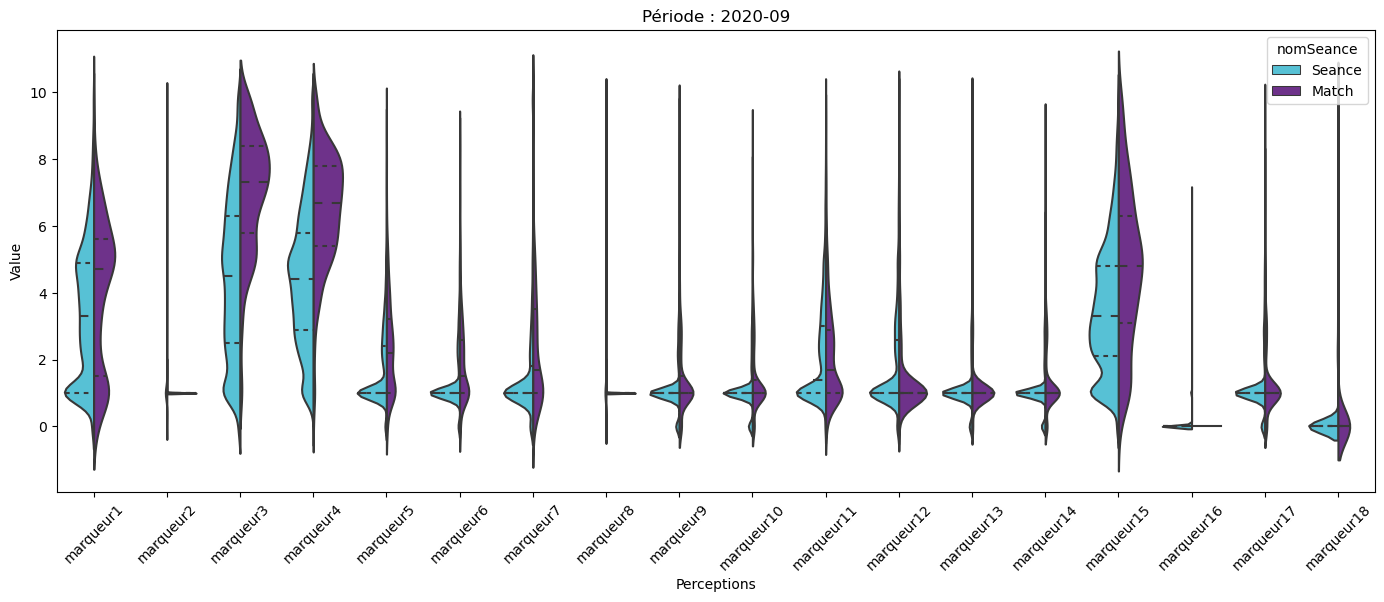

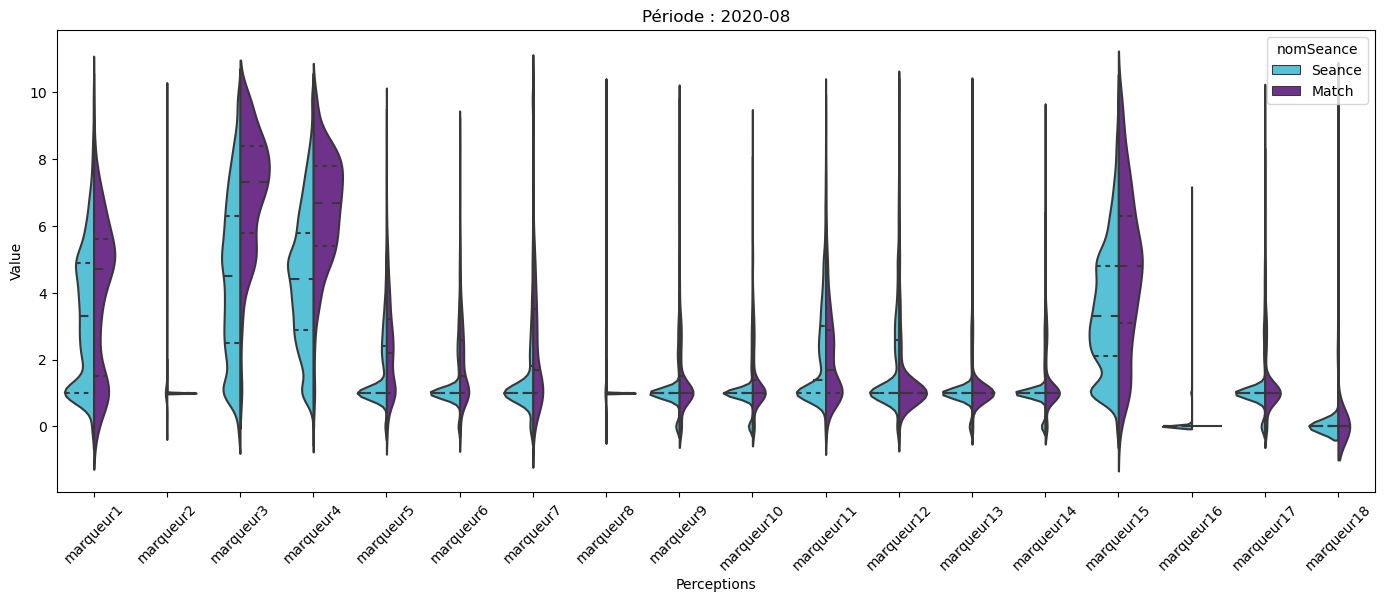

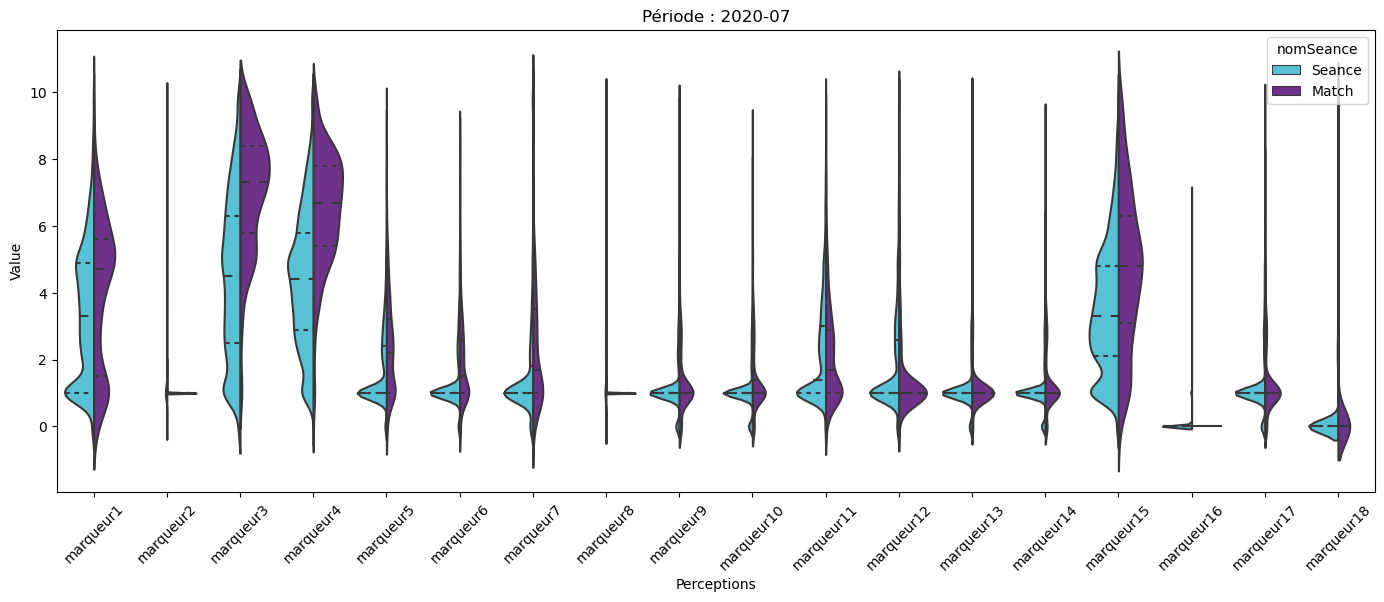

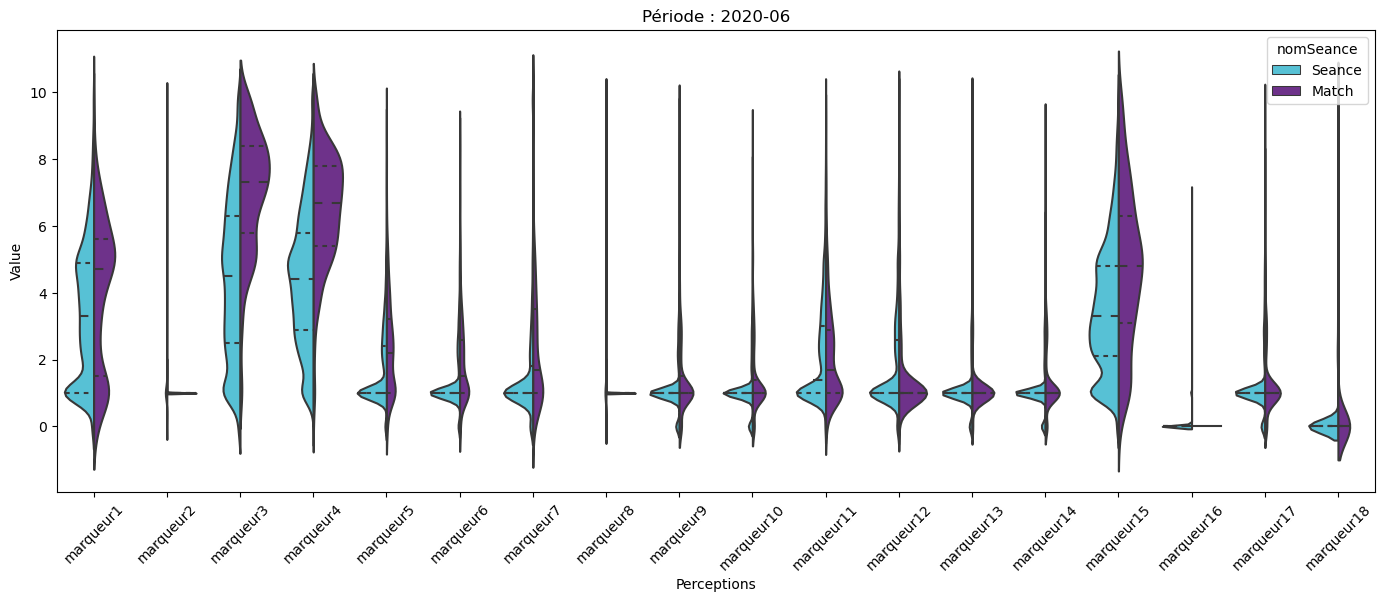

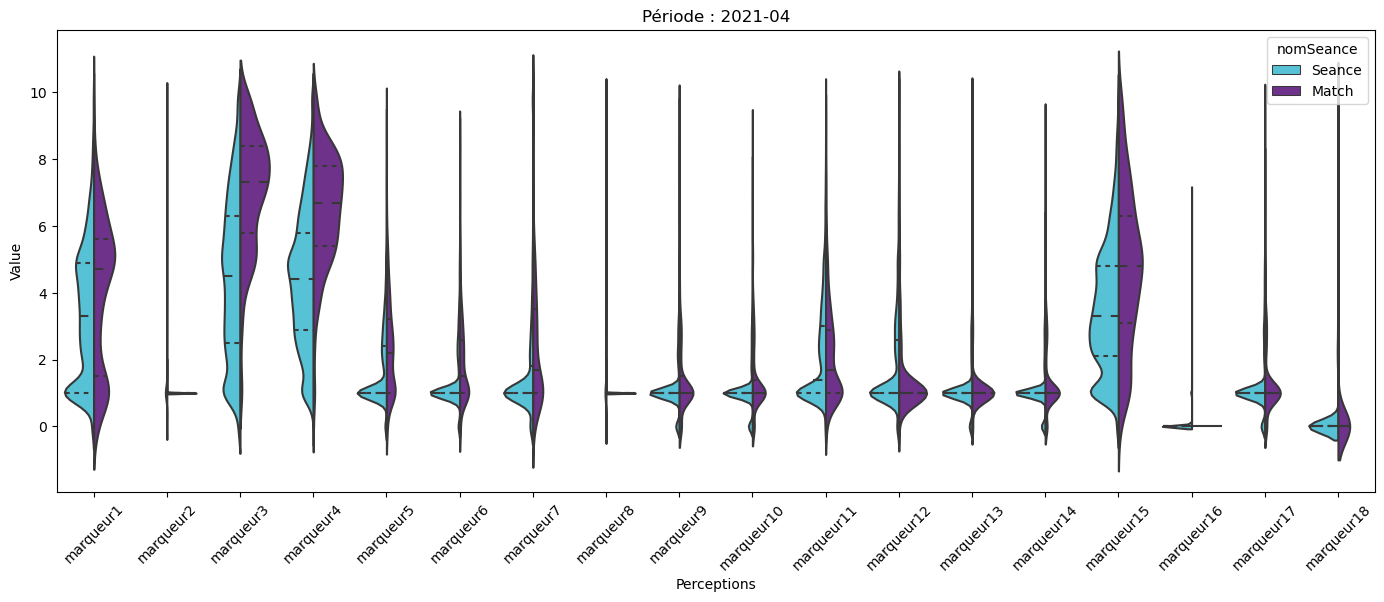

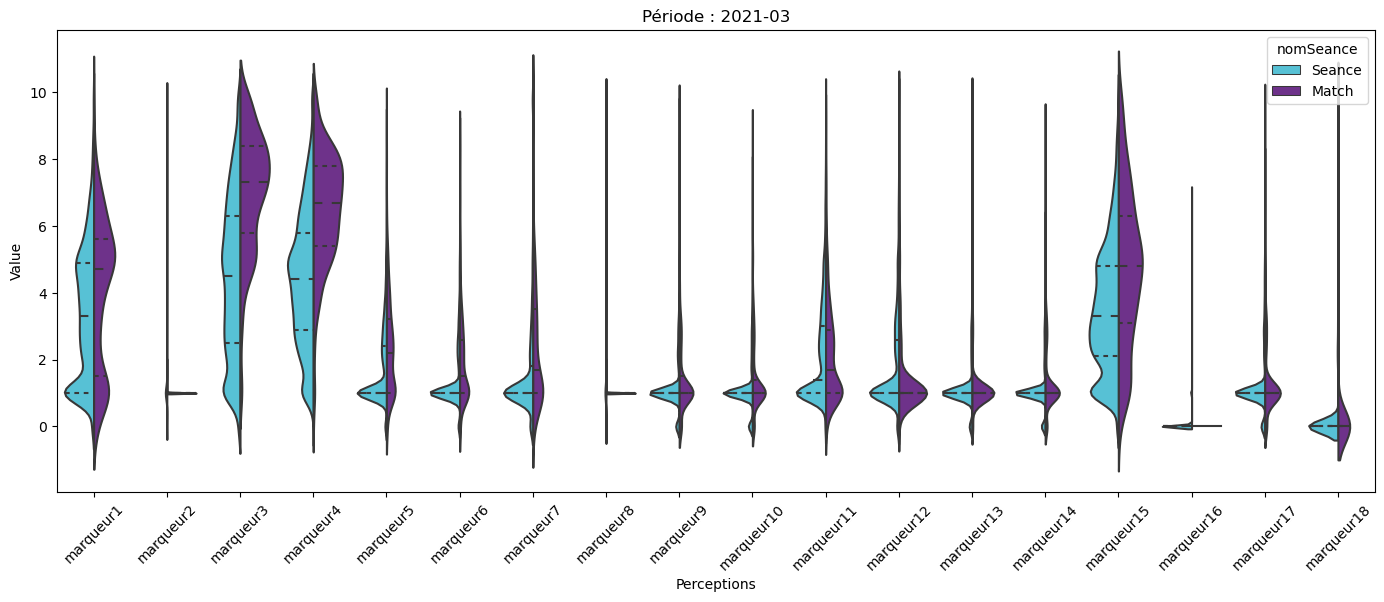

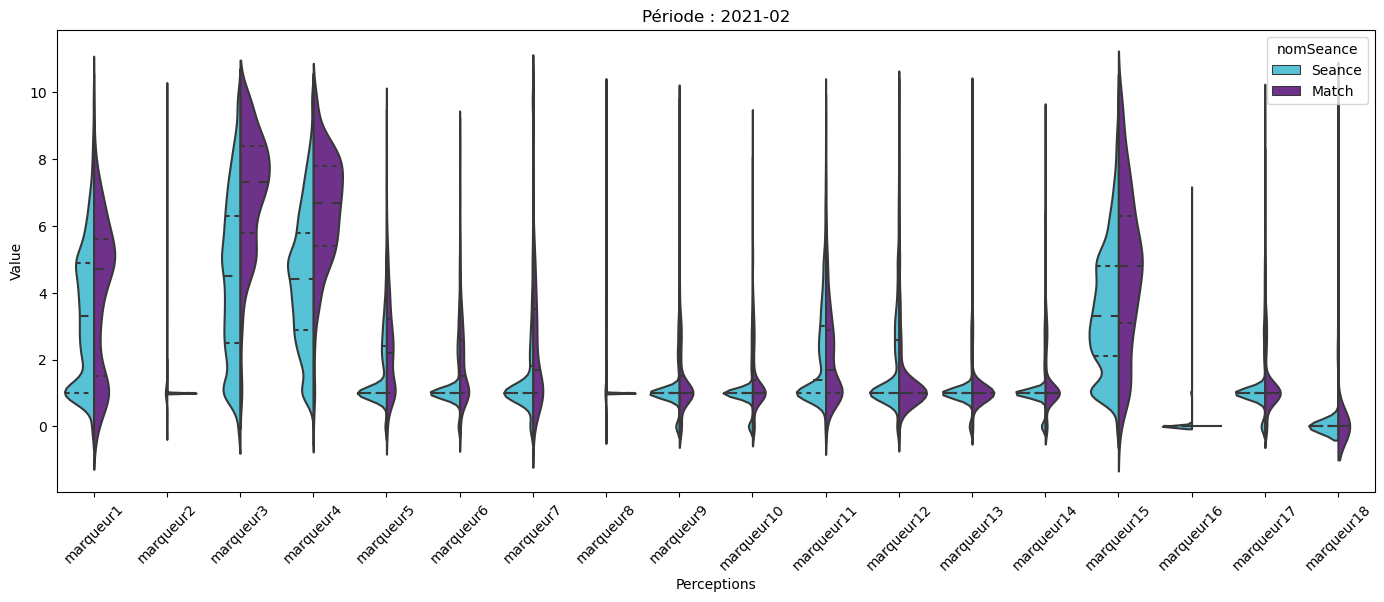

In [19]:
for period in df_split_arranged.Periode.unique():
    fig, ax = plt.subplots()
    fig.set_size_inches(17, 6)
    plt.xticks(rotation=45)
    plt.title('Période : {}'.format(period))
    violin_colors = {'Seance': '#42D0EA', 'Match': '#732399'}
    sns.violinplot(data=df_split_arranged, x='Perceptions', y='Value', hue='nomSeance', palette=violin_colors, split=True,
                   inner='quartile')

# Test de Wilcoxon
(les marqueurs sont qualitatifs)

In [20]:
df_saison_copy = df_split.copy()

## Comparer d'abord les semaines entre elles (séances et matchs)

In [21]:
df_wilc = df_saison_copy.groupby(['numsemaine', 'sportif']).median()
df_wilc

marqueur1  marqueur2  marqueur3  marqueur4  marqueur5  \
numsemaine sportif                                                            
2027       Joueur-1        3.95        1.3       3.20       2.95       3.80   
           Joueur-11       4.50        3.4       1.00       3.40       2.10   
           Joueur-12       2.70        1.2       4.80       4.60       3.40   
           Joueur-13       1.30        1.0       3.80       3.40       2.00   
           Joueur-14       4.30        1.0       4.80       4.20       1.00   
...                         ...        ...        ...        ...        ...   
2114       Joueur-8        2.50        1.0       3.05       4.05       1.00   
           Joueur-9        2.10        1.0       4.80       3.60       1.95   
2115       Joueur-11       4.30        1.0       1.00       2.20       1.00   
           Joueur-16       1.00        1.0       2.40       2.70       2.90   
           Joueur-24       3.30        1.0       3.80       3.80       1.00   

                      marqueur6  marqueur7  marqueur8  marqueur9  marqueur10  \
numsemaine sportif                                                             
2027       Joueur-1         3.8       0.65        3.2       1.25        4.55   
           Joueur-11        1.0       1.70        2.6       1.70        1.90   
           Joueur-12        1.0       1.00        1.3       1.00        1.00   
           Joueur-13        1.0       2.40        1.0       1.00        1.00   
           Joueur-14        1.0       1.00        1.0       1.00        1.00   
...                         ...        ...        ...        ...         ...   
2114       Joueur-8         1.0       1.00        1.0       1.00        1.00   
           Joueur-9         1.0       1.00        1.0       1.00        1.00   
2115       Joueur-11        1.0       1.00        1.0       1.00        1.60   
           Joueur-16        2.6       0.00        1.0       0.00        0.00   
           Joueur-24        1.0       1.00        1.0       1.00        1.00   

                      marqueur11  marqueur12  marqueur13  marqueur14  \
numsemaine sportif                                                     
2027       Joueur-1         3.85        1.25         1.6         1.6   
           Joueur-11        2.80        2.90         1.8         1.7   
           Joueur-12        3.20        1.00         1.0         1.0   
           Joueur-13        2.00        1.10         1.0         1.0   
           Joueur-14        1.00        1.00         1.0         1.0   
...                          ...         ...         ...         ...   
2114       Joueur-8         2.60        2.55         1.0         1.0   
           Joueur-9         1.00        1.00         1.0         1.0   
2115       Joueur-11        2.90        2.70         3.3         1.6   
           Joueur-16        5.00        0.00         0.0         0.0   
           Joueur-24        1.00        1.00         1.0         1.0   

                      marqueur15  marqueur16  marqueur17  marqueur18  
numsemaine sportif                                                    
2027       Joueur-1         3.85         1.0         1.2         0.0  
           Joueur-11        3.20         1.0         2.9         0.0  
           Joueur-12        4.10         1.0         1.0         0.0  
           Joueur-13        2.30         1.0         1.0         0.0  
           Joueur-14        3.80         1.0         1.0         0.0  
...                          ...         ...         ...         ...  
2114       Joueur-8         3.10         0.0         1.0         0.0  
           Joueur-9         1.00         0.0         1.0         0.0  
2115       Joueur-11        3.20         0.0         1.0         0.0  
           Joueur-16        3.00         0.0         0.0         0.0  
           Joueur-24        1.00         0.0         1.0         0.0  

[1027 rows x 18 columns]

In [22]:
df_wilc.T

numsemaine     2027                                                    \
sportif    Joueur-1 Joueur-11 Joueur-12 Joueur-13 Joueur-14 Joueur-15   
marqueur1      3.95       4.5       2.7       1.3       4.3       1.0   
marqueur2      1.30       3.4       1.2       1.0       1.0       1.0   
marqueur3      3.20       1.0       4.8       3.8       4.8       4.6   
marqueur4      2.95       3.4       4.6       3.4       4.2       5.1   
marqueur5      3.80       2.1       3.4       2.0       1.0       1.0   
marqueur6      3.80       1.0       1.0       1.0       1.0       1.0   
marqueur7      0.65       1.7       1.0       2.4       1.0       1.0   
marqueur8      3.20       2.6       1.3       1.0       1.0       1.0   
marqueur9      1.25       1.7       1.0       1.0       1.0       1.0   
marqueur10     4.55       1.9       1.0       1.0       1.0       1.0   
marqueur11     3.85       2.8       3.2       2.0       1.0       1.0   
marqueur12     1.25       2.9       1.0       1.1       1.0       1.0   
marqueur13     1.60       1.8       1.0       1.0       1.0       1.0   
marqueur14     1.60       1.7       1.0       1.0       1.0       1.0   
marqueur15     3.85       3.2       4.1       2.3       3.8       1.0   
marqueur16     1.00       1.0       1.0       1.0       1.0       1.0   
marqueur17     1.20       2.9       1.0       1.0       1.0       1.0   
marqueur18     0.00       0.0       0.0       0.0       0.0       0.0   

numsemaine                                          ...      2114           \
sportif    Joueur-16 Joueur-17 Joueur-18 Joueur-19  ... Joueur-29 Joueur-3   
marqueur1        2.1       4.1       5.4       1.1  ...      1.50      1.0   
marqueur2        1.9       2.0       1.0       1.0  ...      1.00      1.0   
marqueur3        3.5       4.9       5.5       1.6  ...      5.35      1.0   
marqueur4        3.2       3.7       5.4       1.3  ...      4.65      1.0   
marqueur5        2.3       4.2       1.0       1.0  ...      1.00      1.0   
marqueur6        2.0       3.8       1.0       1.0  ...      1.00      1.0   
marqueur7        0.0       1.9       1.0       1.0  ...      1.00      1.0   
marqueur8        1.2       1.9       1.0       1.0  ...      1.00      1.0   
marqueur9        0.0       2.0       1.0       1.0  ...      1.00      1.0   
marqueur10       0.0       1.9       1.0       1.0  ...      1.00      1.0   
marqueur11       0.5       3.8       2.4       1.0  ...      1.00      1.0   
marqueur12       0.0       1.8       1.0       2.1  ...      1.00      1.0   
marqueur13       0.0       2.0       1.0       1.0  ...      1.00      1.0   
marqueur14       0.0       1.9       1.0       1.0  ...      1.00      1.0   
marqueur15       3.2       3.6       3.8       1.7  ...      3.05      2.1   
marqueur16       1.0       1.0       1.0       1.0  ...      0.00      0.0   
marqueur17       0.0       2.0       1.0       1.0  ...      1.00      1.0   
marqueur18       0.0       0.0       0.0       0.0  ...      0.00      0.0   

numsemaine                                                   2115            \
sportif    Joueur-4 Joueur-5 Joueur-7 Joueur-8 Joueur-9 Joueur-11 Joueur-16   
marqueur1       2.7     2.35      5.5     2.50     2.10       4.3       1.0   
marqueur2       2.6     1.65      1.0     1.00     1.00       1.0       1.0   
marqueur3       3.4     2.85      6.4     3.05     4.80       1.0       2.4   
marqueur4       3.8     2.95      6.3     4.05     3.60       2.2       2.7   
marqueur5       2.3     1.35      1.0     1.00     1.95       1.0       2.9   
marqueur6       2.6     1.00      1.0     1.00     1.00       1.0       2.6   
marqueur7       2.2     1.00      1.0     1.00     1.00       1.0       0.0   
marqueur8       2.2     1.65      1.0     1.00     1.00       1.0       1.0   
marqueur9       2.2     1.00      1.0     1.00     1.00       1.0       0.0   
marqueur10      2.5     1.00      1.0     1.00     1.00       1.6       0.0   
marqueur11      2.3     1.20  

In [23]:
df_wilc = df_wilc.reset_index()
df_wilc = df_wilc.set_index('sportif')

In [24]:
#Création d'une table avec la valeur médiane du marqueur pour chaque joueur pour chaque semaine
#Exemple avec marqueur1
ct = pd.crosstab(df_saison_copy['sportif'], df_saison_copy['numsemaine'], values=df_saison_copy['marqueur1'], aggfunc='median')
ct

numsemaine,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,...,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115
sportif,,,,,,,,,,,,,,,,,,,,,
Joueur-1,3.95,NaN,4.25,4.35,3.7,4.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-10,NaN,NaN,1.85,4.30,4.2,3.40,4.70,4.50,3.25,4.65,...,4.10,4.65,5.25,4.90,4.10,4.70,4.90,4.45,4.50,NaN
Joueur-11,4.50,4.2,5.40,6.40,4.3,5.60,4.50,5.05,4.95,4.40,...,3.50,3.80,3.70,4.70,4.60,4.70,5.25,3.60,3.50,4.3
Joueur-12,2.70,2.4,5.00,4.80,2.6,3.80,3.70,2.95,2.85,2.45,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN
Joueur-13,1.30,2.1,4.70,4.80,1.0,1.80,2.10,2.25,2.10,2.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joueur-14,4.30,3.7,4.90,5.05,4.0,4.85,4.50,4.40,4.30,4.20,...,4.10,4.60,5.20,4.15,5.20,4.40,5.50,NaN,NaN,NaN
Joueur-15,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN
Joueur-16,2.10,1.0,2.60,2.55,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.40,2.40,1.00,2.00,2.40,2.30,1.45,1.00,1.0
Joueur-17,4.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Identifier les semaines avec au moins 75% des joueurs ayant saisi
ct.dropna(axis=1, thresh=len(ct)*0.75, inplace=True)
print(ct.columns)
print(len(ct))

Int64Index([2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037,
            2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
            2049, 2050, 2051, 2053, 2101, 2102, 2103, 2104, 2105, 2106, 2107,
            2108, 2109, 2110, 2111, 2112, 2113, 2114],
           dtype='int64', name='numsemaine')
29


In [26]:
#Conserver les semaines ayant une semaine qui la précède
wilc_sem = [2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 
            2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2102, 2103, 2104, 2105, 2106, 2107,2108, 
            2109, 2110, 2111, 2112, 2113, 2114]

In [27]:
wilc_tab = pd.DataFrame(columns=wilc_sem, index=plot_columns)

for sem in wilc_sem:
    for col in plot_columns:
        sample1 = df_wilc.loc[df_wilc.numsemaine == sem-1, col]
        sample2 = df_wilc.loc[df_wilc.numsemaine == sem, col]
        wilc_data = {'Previous': sample1, 'Current': sample2}
        wilc_df = pd.concat(wilc_data, axis=1).dropna()
        stat, p = stats.wilcoxon(wilc_df['Current'], wilc_df['Previous'])
        statg, pg = stats.wilcoxon(wilc_df['Current'], wilc_df['Previous'], alternative='greater')
        statl, pl = stats.wilcoxon(wilc_df['Current'], wilc_df['Previous'], alternative='less')
        if p > 0.05:
            sign = '='
        elif p < 0.05 and pg < 0.05:
            sign = '>'
        elif p <0.05 and pl < 0.05:
            sign = '<'
        wilc_tab.loc[col, sem] = sign 

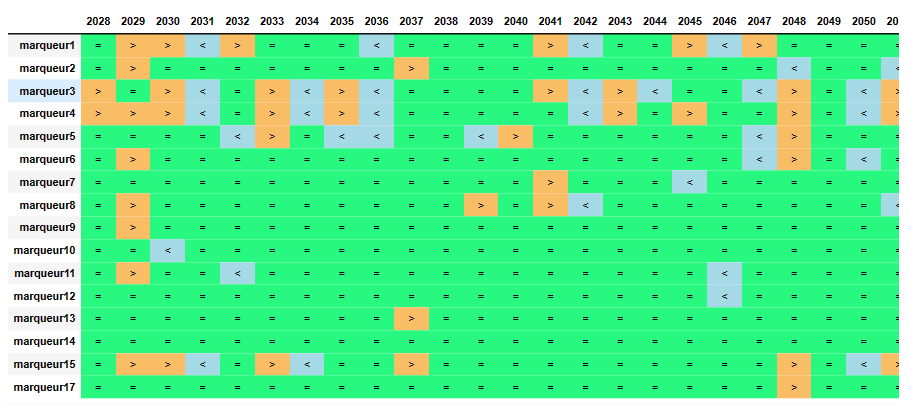

In [35]:
#Visualiser avec des couleurs selon le résultat obtenu au test de Wilcoxon
wilc_tab.style.set_properties(**{'text-align': 'center'}).\
applymap(lambda x: 'background-color : #A4D9E5' if x == '<' else ('background-color : #29F880' if x == '=' \
                                                                    else 'background-color : #F9BE65'))
Image(filename='monitoring1-1.PNG')

## Comparer les saisies des séances de chaque semaine avec celles du match de la semaine

In [29]:
df_wilc2 = df_saison_copy.groupby(['numsemaine', 'sportif', 'nomSeance']).median()
df_wilc2 = df_wilc2.reset_index()
df_wilc2 = df_wilc2.set_index('sportif')
df_wilc2

,numsemaine,nomSeance,marqueur1,marqueur2,marqueur3,marqueur4,marqueur5,marqueur6,marqueur7,marqueur8,marqueur9,marqueur10,marqueur11,marqueur12,marqueur13,marqueur14,marqueur15,marqueur16,marqueur17,marqueur18
sportif,,,,,,,,,,,,,,,,,,,,
Joueur-1,2027,Seance,3.95,1.3,3.20,2.95,3.80,3.8,0.65,3.2,1.25,4.55,3.85,1.25,1.6,1.6,3.85,1.0,1.2,0.0
Joueur-11,2027,Seance,4.50,3.4,1.00,3.40,2.10,1.0,1.70,2.6,1.70,1.90,2.80,2.90,1.8,1.7,3.20,1.0,2.9,0.0
Joueur-12,2027,Seance,2.70,1.2,4.80,4.60,3.40,1.0,1.00,1.3,1.00,1.00,3.20,1.00,1.0,1.0,4.10,1.0,1.0,0.0
Joueur-13,2027,Seance,1.30,1.0,3.80,3.40,2.00,1.0,2.40,1.0,1.00,1.00,2.00,1.10,1.0,1.0,2.30,1.0,1.0,0.0
Joueur-14,2027,Seance,4.30,1.0,4.80,4.20,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.0,3.80,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joueur-9,2114,Match,3.15,1.0,5.65,4.30,2.30,1.3,5.45,1.0,2.60,1.00,2.35,1.00,1.0,1.0,1.00,0.0,1.0,0.0
Joueur-9,2114,Seance,2.00,1.0,4.60,3.55,1.65,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.80,0.0,1.0,0.0
Joueur-11,2115,Seance,4.30,1.0,1.00,2.20,1.00,1.0,1.00,1.0,1.00,1.60,2.90,2.70,3.3,1.6,3.20,0.0,1.0,0.0


In [30]:
#Conserver les semaines avec match
ct2 = pd.crosstab(df_wilc2['nomSeance'], df_wilc2['numsemaine'], values=df_wilc2['nomSeance'], aggfunc='count')
ct2 = ct2.dropna(axis=1)
ct2.columns

Int64Index([2031, 2032, 2033, 2035, 2036, 2037, 2038, 2040, 2041, 2042, 2043,
            2044, 2045, 2046, 2047, 2048, 2050, 2051, 2102, 2103, 2106, 2107,
            2108, 2109, 2112, 2113, 2114],
           dtype='int64', name='numsemaine')

In [31]:
wilc_sem2 = [2031, 2032, 2033, 2035, 2036, 2037, 2038, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2050, 
             2051, 2102, 2103, 2106, 2107, 2108, 2109, 2112, 2113, 2114]

In [32]:
wilc_tab2 = pd.DataFrame(columns=wilc_sem2, index=plot_columns)

for sem2 in wilc_sem2:
    for col2 in plot_columns:
        sample1b = df_wilc2.loc[(df_wilc2.numsemaine == sem2) & (df_wilc2.nomSeance == 'Seance'), col2]
        sample2b = df_wilc2.loc[(df_wilc2.numsemaine == sem2) & (df_wilc2.nomSeance == 'Match'), col2]
        wilc_data2 = {'Seances': sample1, 'Match': sample2}
        wilc_df2 = pd.concat(wilc_data2, axis=1).dropna()
        stat2, p2 = stats.wilcoxon(wilc_df2['Seances'], wilc_df2['Match'])
        stat2g, p2g = stats.wilcoxon(wilc_df2['Seances'], wilc_df2['Match'], alternative = 'greater')
        stats2l, p2l = stats.wilcoxon(wilc_df2['Seances'], wilc_df2['Match'], alternative = 'less')
        if p2 > 0.05:
            sign2 = '='
        elif p2 < 0.05 and p2g < 0.05:
            sign2 = '>'
        elif p2 <0.05 and p2l < 0.05:
            sign2 = '<'
        wilc_tab2.loc[col2, sem2] = sign2 

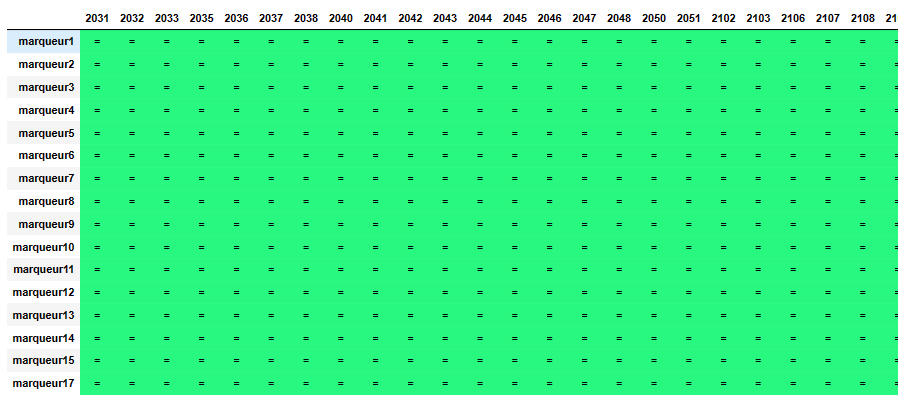

In [36]:
wilc_tab2.style.set_properties(**{'text-align': 'center'}).\
applymap(lambda x: 'background-color : #A4D9E5' if x == '<' else ('background-color : #29F880' if x == '=' \
                                                                    else 'background-color : #F9BE65'))
Image(filename='monitoring1-2.PNG')